In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('Emission.csv')
df

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
63099,Global,WLD,2017,36096.739276,14506.973805,12242.627935,7144.928128,1507.923185,391.992176,302.294047,4.749682
63100,Global,WLD,2018,36826.506600,14746.830688,12266.016285,7529.846784,1569.218392,412.115746,302.478706,4.792753
63101,Global,WLD,2019,37082.558969,14725.978025,12345.653374,7647.528220,1617.506786,439.253991,306.638573,4.775633
63102,Global,WLD,2020,35264.085734,14174.564010,11191.808551,7556.290283,1637.537532,407.583673,296.301685,4.497423


### Check if we have duplicate rows

In [2]:
df[df.duplicated()]

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita


### Check for null

In [3]:
df.isnull().sum()

Country                   0
ISO 3166-1 alpha-3     1632
Year                      0
Total                   200
Coal                  41360
Oil                   41387
Gas                   41486
Cement                42290
Flaring               41554
Other                 61484
Per Capita            44130
dtype: int64

### Deal with null data we have

In [4]:
nname = df[df['ISO 3166-1 alpha-3'].isnull()]['Country'].unique()
nname

array(['French Equatorial Africa', 'French West Africa',
       'Kuwaiti Oil Fires', 'Leeward Islands', 'Pacific Islands (Palau)',
       'Ryukyu Islands'], dtype=object)

In [5]:
nname = df[df['ISO 3166-1 alpha-3'].isnull()]['Country'].unique()
for i in nname:
    if i == 'French Equatorial Africa':
        x = df[df['Country']==str(i)]['ISO 3166-1 alpha-3'].index
        for j in x:
            df.at[j,'ISO 3166-1 alpha-3'] = 'FEA'
    elif i == 'French West Africa':
        x = df[df['Country']==str(i)]['ISO 3166-1 alpha-3'].index
        for j in x:
            df.at[j,'ISO 3166-1 alpha-3'] = 'FWA'
    elif i == 'Kuwaiti Oil Fires':
        x = df[df['Country']==str(i)]['ISO 3166-1 alpha-3'].index
        for j in x:
            df.at[j,'ISO 3166-1 alpha-3'] = 'KOF'
    elif i == 'Leeward Islands':
        x = df[df['Country']==str(i)]['ISO 3166-1 alpha-3'].index
        for j in x:
            df.at[j,'ISO 3166-1 alpha-3'] = 'LWI'
    elif i == 'Pacific Islands (Palau)':
        x = df[df['Country']==str(i)]['ISO 3166-1 alpha-3'].index
        for j in x:
            df.at[j,'ISO 3166-1 alpha-3'] = 'PIP'
    elif i == 'Ryukyu Islands':
        x = df[df['Country']==str(i)]['ISO 3166-1 alpha-3'].index
        for j in x:
            df.at[j,'ISO 3166-1 alpha-3'] = 'RKI'

In [6]:
df[df.Total.isnull()].any()

Country                True
ISO 3166-1 alpha-3     True
Year                   True
Total                 False
Coal                  False
Oil                   False
Gas                   False
Cement                False
Flaring               False
Other                 False
Per Capita            False
dtype: bool

In [7]:
df.fillna(0,inplace=True)
df.isnull().sum()

Country               0
ISO 3166-1 alpha-3    0
Year                  0
Total                 0
Coal                  0
Oil                   0
Gas                   0
Cement                0
Flaring               0
Other                 0
Per Capita            0
dtype: int64

### Export for EDA process and Visualization

In [8]:
df.to_csv('Emission_Done.csv')

### Let's have a little explore through out data

In [9]:
c = df.Country.unique()

In [10]:
print('First year that emissions appeared in dataset')
for i in c:
    x = df[(df['Country']==i) & (df['Total']>0)].Year.min()
    print('{} : {}'.format(i,x))

First year that emissions appeared in dataset
Afghanistan : 1949
Albania : 1933
Algeria : 1916
Andorra : 1990
Angola : 1950
Anguilla : 1990
Antarctica : 1987
Antigua and Barbuda : 1957
Argentina : 1887
Armenia : 1830
Aruba : 1926
Australia : 1860
Austria : 1807
Azerbaijan : 1830
Bahamas : 1950
Bahrain : 1933
Bangladesh : 1946
Barbados : 1928
Belarus : 1830
Belgium : 1802
Belize : 1950
Benin : 1958
Bermuda : 1950
Bhutan : 1970
Bonaire, Saint Eustatius and Saba : 1926
Bosnia and Herzegovina : 1885
Botswana : 1972
Brazil : 1901
British Virgin Islands : 1962
Brunei Darussalam : 1933
Bulgaria : 1881
Burkina Faso : 1958
Burundi : 1950
Cambodia : 1955
Canada : 1785
Cape Verde : 1950
Central African Republic : 1959
Chad : 1959
Chile : 1895
China : 1907
Christmas Island : 1970
Colombia : 1921
Comoros : 1959
Congo : 1959
Cook Islands : 1969
Costa Rica : 1950
Côte d'Ivoire : 1958
Croatia : 1885
Cuba : 1941
Curaçao : 1926
Cyprus : 1950
Czech Republic : 1860
North Korea : 1905
Democratic Republic o

In [11]:
print('\tCO2 Total emissions by milloin tonnes')
df[df['Country'] != 'Global'].groupby('Country')['Total'].sum().sort_values(ascending = False).head(3)

	CO2 Total emissions by milloin tonnes


Country
USA       421906.855203
China     249352.817660
Russia    117547.631435
Name: Total, dtype: float64

In [12]:
cnx=df[df['Country'] == 'China'].Year
cny=df[df['Country'] == 'China'].Total
usx=df[df['Country'] == 'USA'].Year
usy=df[df['Country'] == 'USA'].Total
rsx=df[df['Country'] == 'Russia'].Year
rsy=df[df['Country'] == 'Russia'].Total

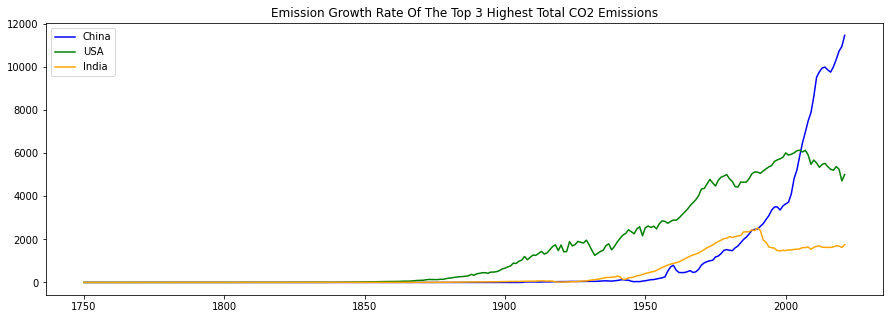

In [13]:
plt.rcParams["figure.figsize"] = (15,5)
plt.title('Emission Growth Rate Of The Top 3 Highest Total CO2 Emissions')
plt.plot(cnx, cny, c='b')
plt.plot(usx, usy, c='g')
plt.plot(rsx, rsy, c='orange')
plt.legend(["China", 'USA', 'India'], loc ="upper left")
plt.show()

In [14]:
n = df.Country.unique()

def isEnglish(s):
  return s.isascii()

print('\tNon-English country names from {} countries'.format(len(n)))
for i in range(len(n)):
    if isEnglish(n[i]) == False:
        print(n[i])

	Non-English country names from 232 countries
Côte d'Ivoire
Curaçao
Réunion


In [15]:
for i in range(3,10):
    print('Average CO2 emissions from {} = {} Million tonnes'.format(df.columns[i], df[df['Country']=='Global'][df.columns[i]].mean()))
print('----Average CO2 emissions per capita = {} tonnes----'.format(df[df['Country']=='Global']['Per Capita'].mean()))

Average CO2 emissions from Total = 6385.772166624999 Million tonnes
Average CO2 emissions from Coal = 2956.581079125 Million tonnes
Average CO2 emissions from Oil = 2226.017414022059 Million tonnes
Average CO2 emissions from Gas = 934.0361071544118 Million tonnes
Average CO2 emissions from Cement = 165.68722520220587 Million tonnes
Average CO2 emissions from Flaring = 67.84663816911764 Million tonnes
Average CO2 emissions from Other = 29.621478691176467 Million tonnes
----Average CO2 emissions per capita = 1.4948445919117643 tonnes----


### Build model to forecast future Global CO2 emissions using Prophet

#### create new dataframe

In [16]:
dfpro = pd.DataFrame(data = df[df['Country']=='Global']['Year'], columns=['Year'])
dfpro['Year'] = pd.to_datetime(dfpro['Year'], format='%Y')

dfpro = dfpro.join(df.Total)
dfpro.rename(columns = {'Year':'ds', 'Total':'y'}, inplace=True)
dfpro

,ds,y
62832,1750-01-01,9.350528
62833,1751-01-01,9.350528
62834,1752-01-01,9.354192
62835,1753-01-01,9.354192
62836,1754-01-01,9.357856
...,...,...
63099,2017-01-01,36096.739276
63100,2018-01-01,36826.506600
63101,2019-01-01,37082.558969
63102,2020-01-01,35264.085734


#### Train/Test split

In [17]:
train = dfpro[dfpro['ds'] < pd.Timestamp('2000-01-01')]
test = dfpro[dfpro['ds'] >= pd.Timestamp('2000-01-01')]

#### fit train data into model

In [18]:
from prophet import Prophet
m = Prophet(changepoint_prior_scale=5)
m.fit(train)

Importing plotly failed. Interactive plots will not work.
03:49:20 - cmdstanpy - INFO - Chain [1] start processing
03:49:20 - cmdstanpy - INFO - Chain [1] done processing


#### Make a prediction and compare with our test data

In [19]:
future = m.make_future_dataframe(periods=22, freq='YS', include_history = True) 

In [20]:
future

,ds
0,1750-01-01
1,1751-01-01
2,1752-01-01
3,1753-01-01
4,1754-01-01
...,...
267,2017-01-01
268,2018-01-01
269,2019-01-01
270,2020-01-01


In [21]:
forecast = m.predict(future)

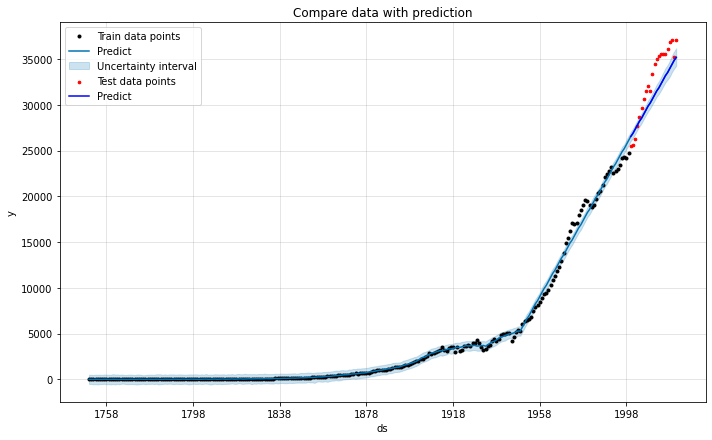

In [22]:
m.plot(forecast)
plt.rcParams["figure.figsize"] = (10,7)
plt.title('Compare data with prediction')
plt.scatter(test['ds'] , test['y'], c='red',s=7)
plt.plot(forecast.iloc[-len(test):]['ds'], forecast.iloc[-len(test):]['yhat'], c='blue')
plt.legend(['Train data points','Predict','Uncertainty interval', 'Test data points','Predict'])
plt.show()

In [23]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1750-01-01,652.818811,-502.237795,519.292182,652.818811,652.818811,-641.320365,-641.320365,-641.320365,-641.320365,-641.320365,-641.320365,0.0,0.0,0.0,11.498446
1,1751-01-01,653.329551,-485.686025,511.192103,653.329551,653.329551,-648.587987,-648.587987,-648.587987,-648.587987,-648.587987,-648.587987,0.0,0.0,0.0,4.741564
2,1752-01-01,653.840291,-535.528257,488.503580,653.840291,653.840291,-652.284289,-652.284289,-652.284289,-652.284289,-652.284289,-652.284289,0.0,0.0,0.0,1.556002
3,1753-01-01,654.352431,-512.534537,521.042196,654.352431,654.352431,-630.636871,-630.636871,-630.636871,-630.636871,-630.636871,-630.636871,0.0,0.0,0.0,23.715560
4,1754-01-01,654.863171,-544.443884,516.998742,654.863171,654.863171,-641.320365,-641.320365,-641.320365,-641.320365,-641.320365,-641.320365,0.0,0.0,0.0,13.542806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,2017-01-01,34137.237789,32750.708223,34334.825329,33598.711073,34782.330953,-612.176989,-612.176989,-612.176989,-612.176989,-612.176989,-612.176989,0.0,0.0,0.0,33525.060800
268,2018-01-01,34552.231225,33078.215984,34787.029308,33961.800402,35249.874658,-591.526264,-591.526264,-591.526264,-591.526264,-591.526264,-591.526264,0.0,0.0,0.0,33960.704961
269,2019-01-01,34967.224661,33575.051313,35362.738679,34321.880111,35728.943274,-566.395219,-566.395219,-566.395219,-566.395219,-566.395219,-566.395219,0.0,0.0,0.0,34400.829442
270,2020-01-01,35382.218097,33956.379569,35810.879417,34671.597721,36220.735160,-536.683157,-536.683157,-536.683157,-536.683157,-536.683157,-536.683157,0.0,0.0,0.0,34845.534940


#### Check performance of the model with test data

In [24]:
from statsmodels.tools.eval_measures import rmse

predictions = forecast.iloc[-len(test):]['yhat']
actuals = test['y']

print(f"RMSE: {round(rmse(predictions, actuals))}")

RMSE: 2257


In [25]:
actuals.mean()

32558.46530236363

#### Check performance of the model with our train data

In [26]:
from statsmodels.tools.eval_measures import rmse

predictions = forecast.iloc[:len(train)]['yhat']
actuals = train['y']

print(f"RMSE: {round(rmse(predictions, actuals))}")

RMSE: 404


In [27]:
actuals.mean()

4082.5751706799997